# **Project Name - DeepFER: Facial Emotion Recognition Using Deep Learning**

**Contribution - Individual**

**Name - Neetu Singh**

**Provide your GitHub Link here.**:https://github.com/neetu-singh29/FER-Facial-Emotion-Recognition-using-Deep-Learning

# **💡 Project Description:** Facial Emotion Recognition



🎯 **Objective:**
To build a deep learning-based model that can detect and classify human emotions from facial expressions in real-time using a webcam. The application can recognize expressions such as:

Angry 😠

Disgust 🤢

Fear 😨

Happy 😄

Neutral 😐

Sad 😢

Surprise 😲



# **📂 Dataset Description**: Each emotion is stored in a separate folder:
Each folder contains grayscale images (48x48 pixels) of faces showing the corresponding emotion.

# Importing Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


# Importing Deep Learning Libraries

In [17]:
# type:ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


# Displaying Images

In [18]:
picture_size = 48
folder_path = "c:/Users/dell/Desktop/Faces/Face_emotion_recognition/Face Emotion Recognition Dataset/images/"

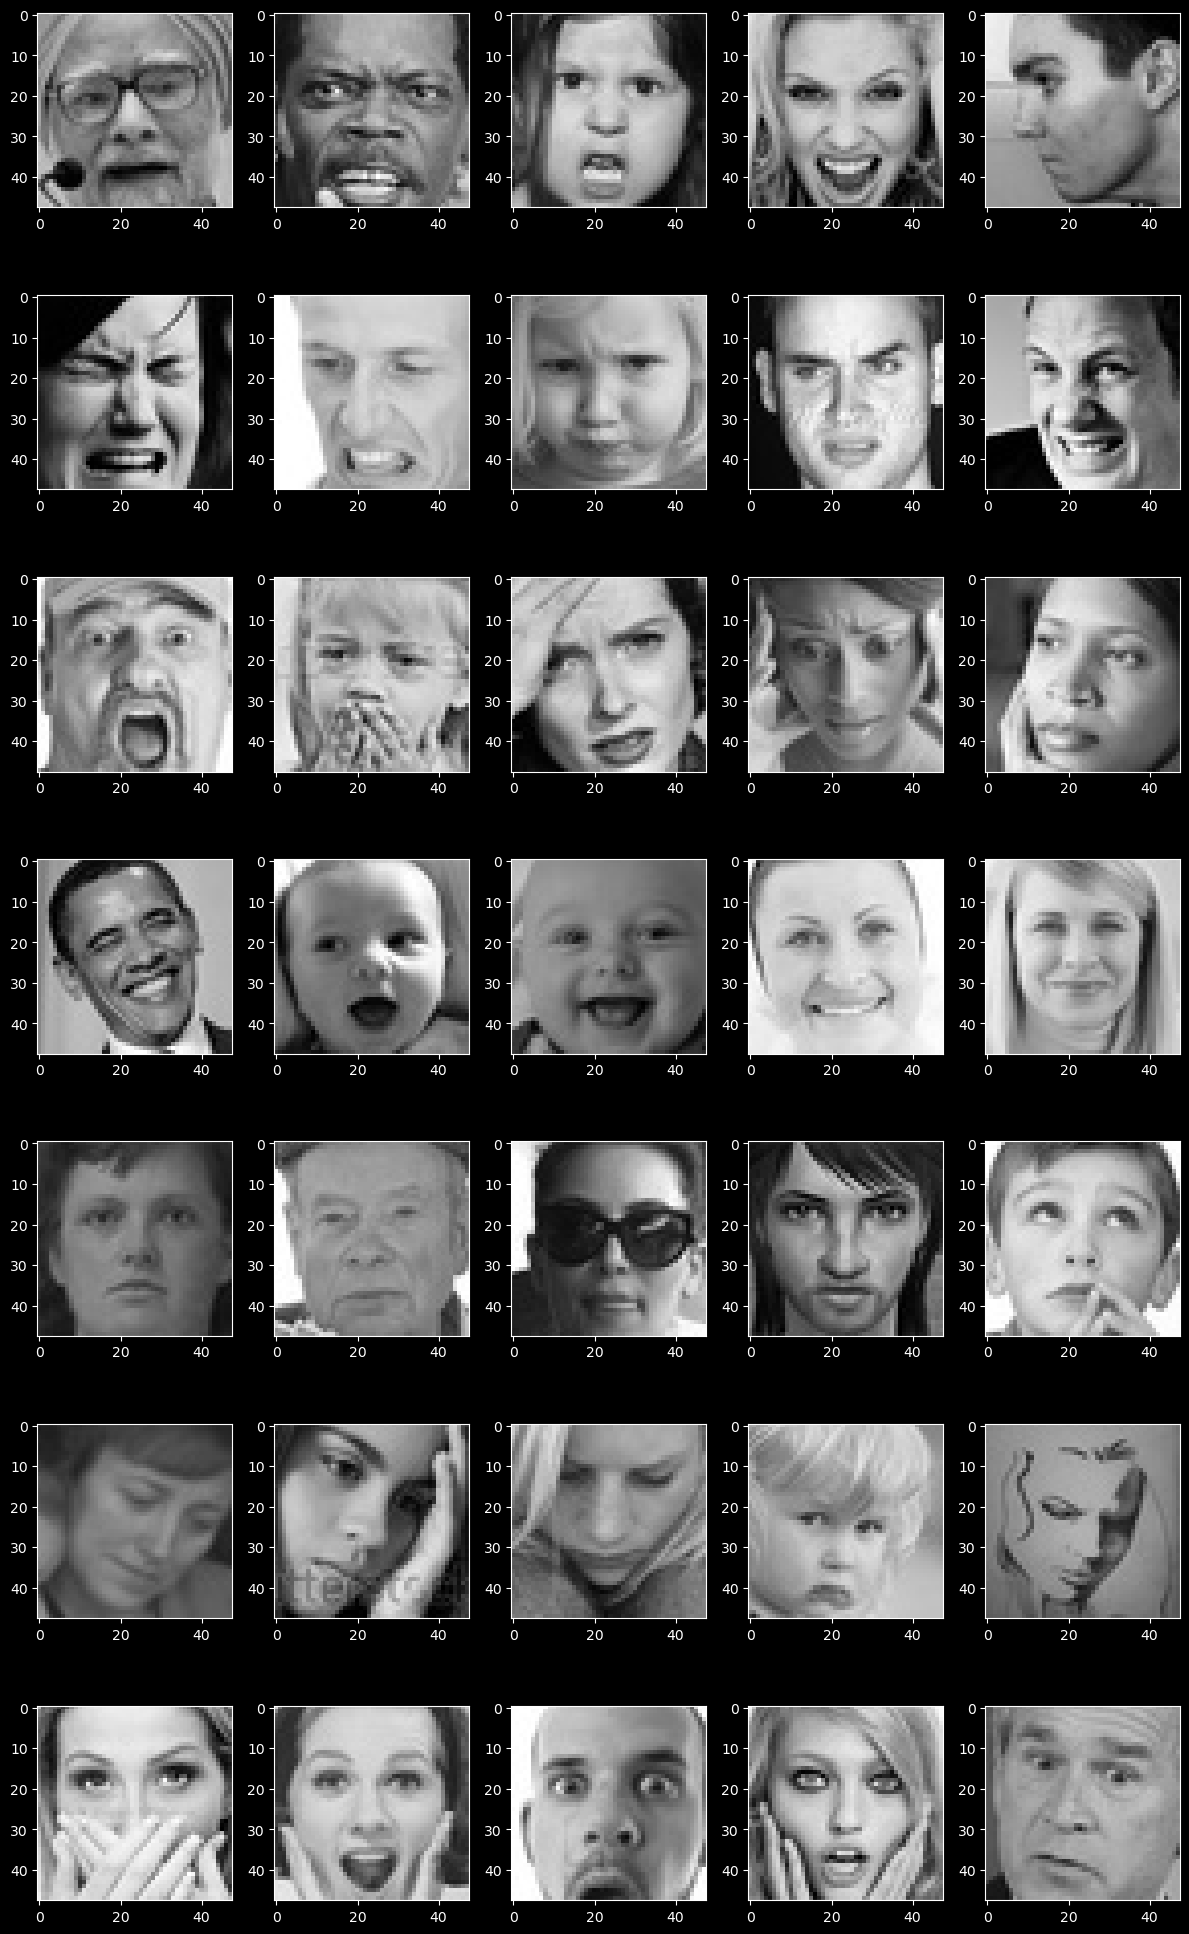

In [19]:
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(folder_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(folder_path + "train/" + expression + "/" +os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

# Displying Happy Images

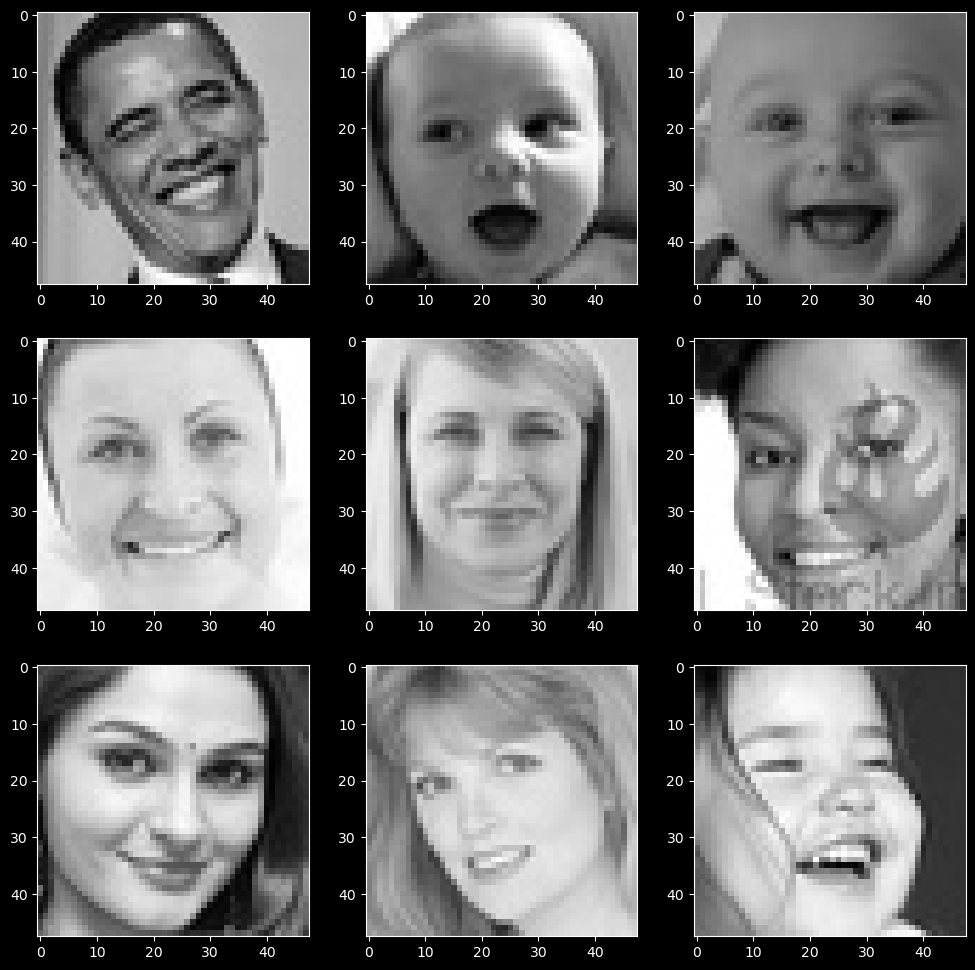

In [20]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Disgust Images

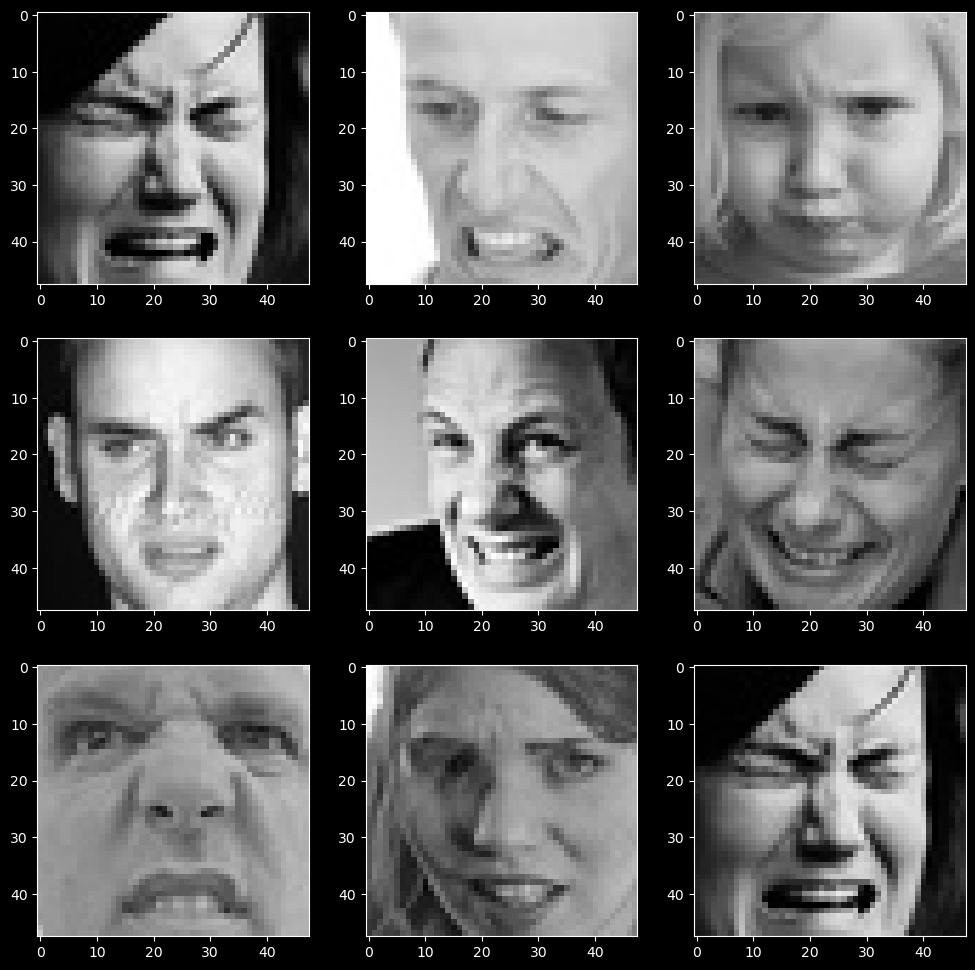

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Sad images

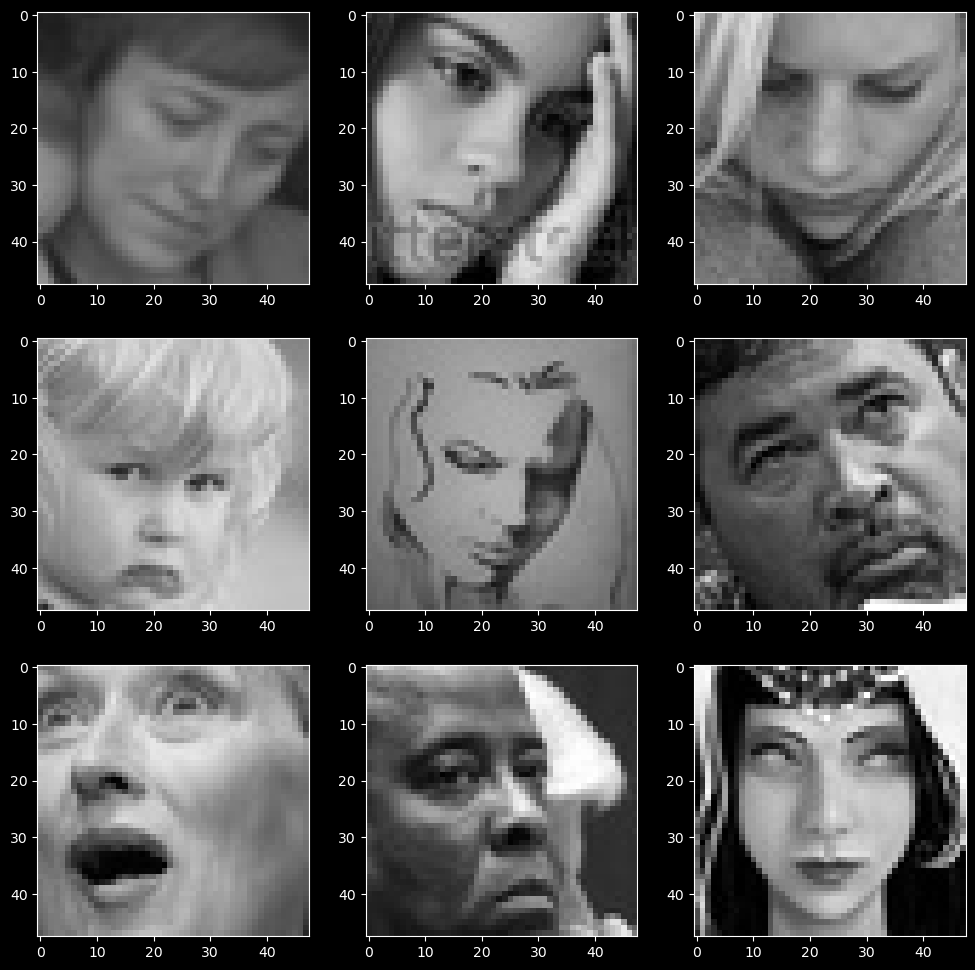

In [26]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Fear images

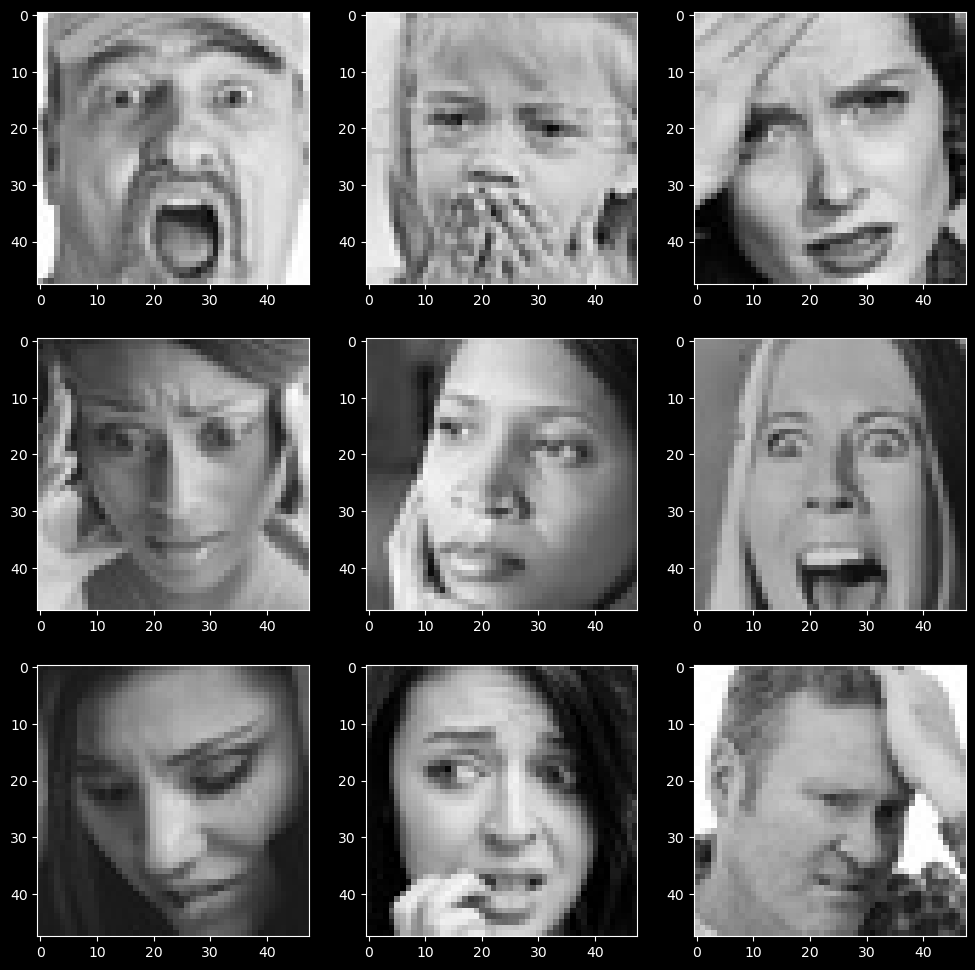

In [27]:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Neutral Images

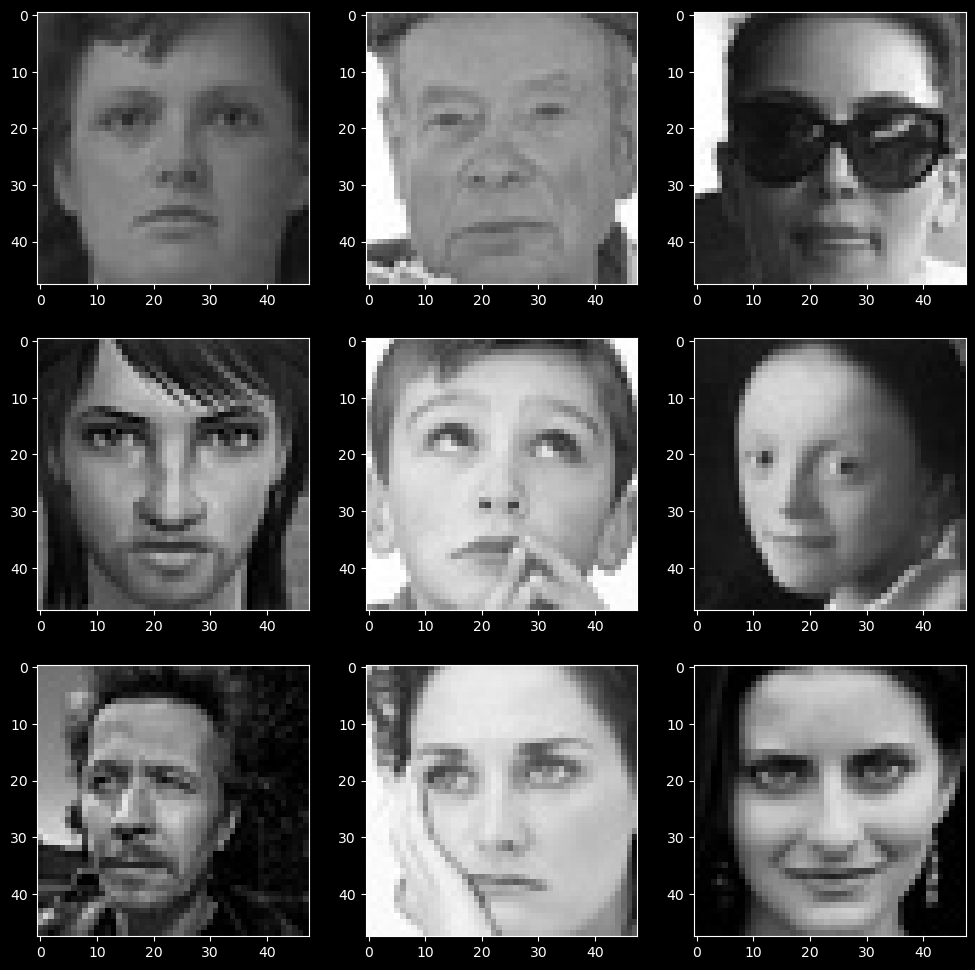

In [30]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Angry Images

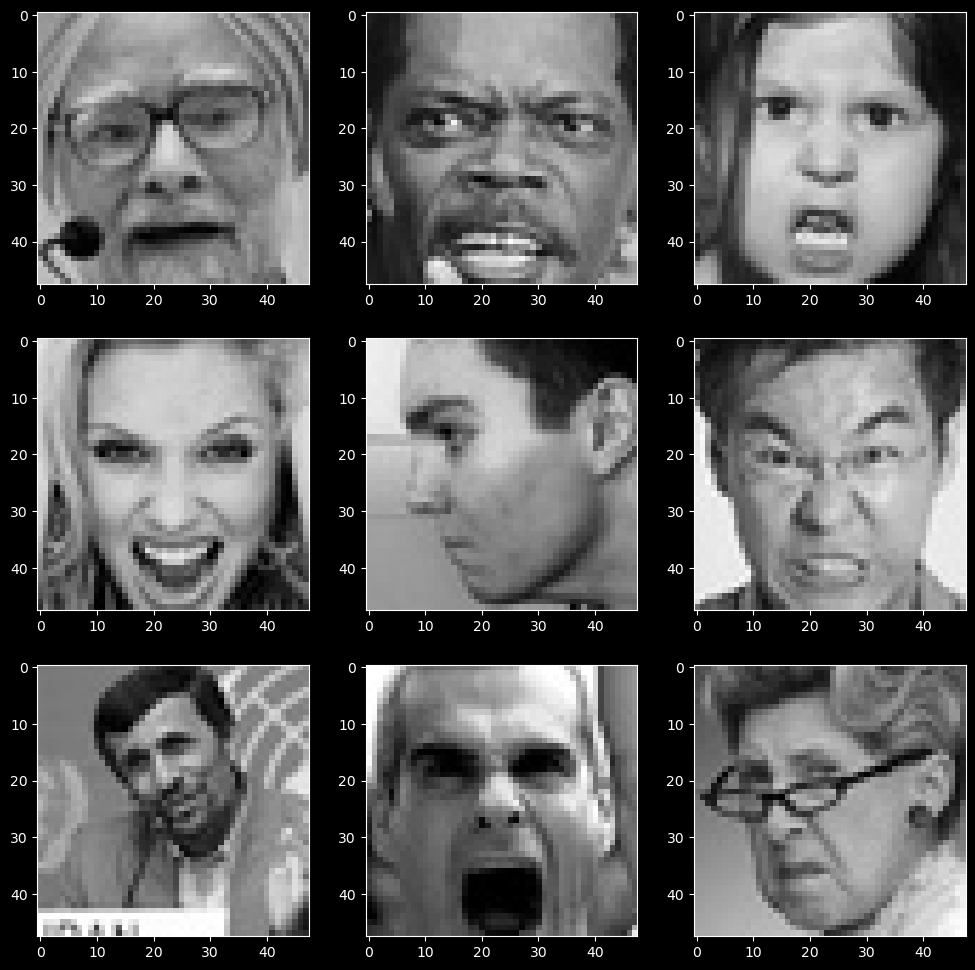

In [31]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Displaying Surprise Images

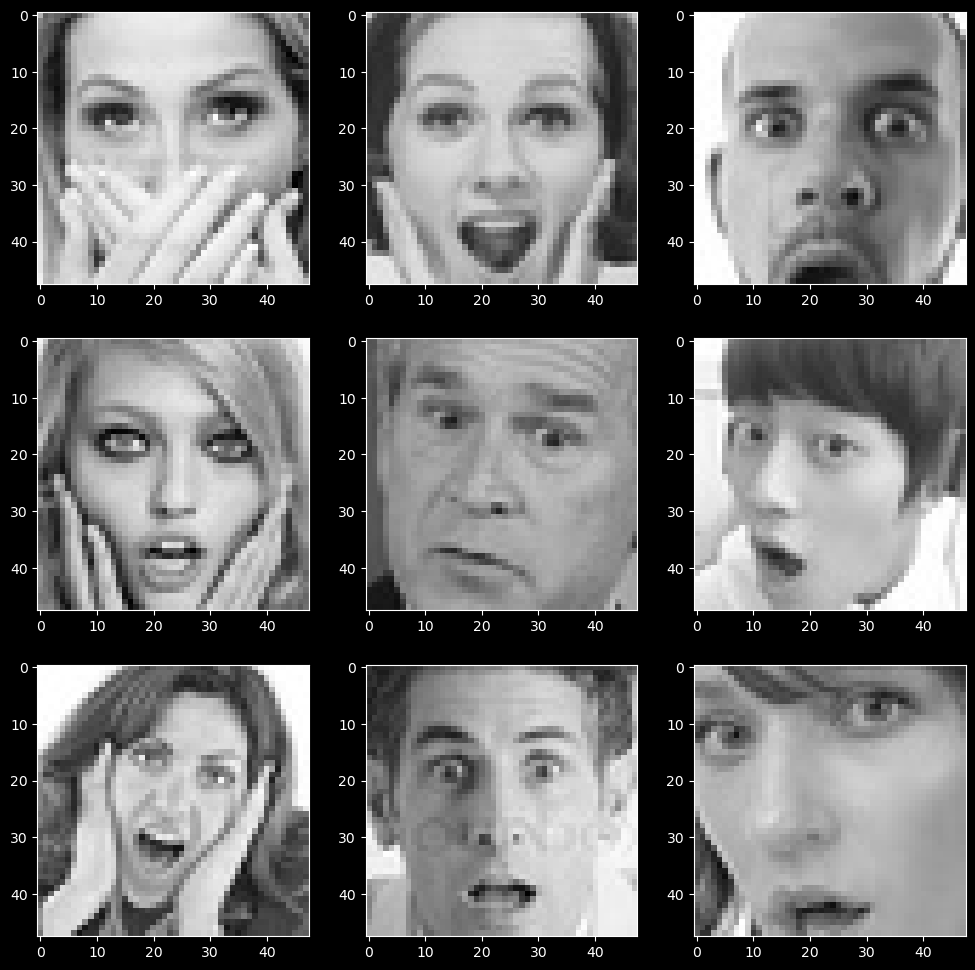

In [32]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [21]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **🧠 Why Use a CNN Model?**
✅ Convolutional Neural Networks (CNNs) are ideal because:

**Feature	    -                 Why It Helps**
1.  Spatial Hierarchy:-	CNNs preserve the spatial relationships (eyes, mouth, etc.) which are key in emotion detection.
2.  Feature Extraction:-	Automatically learn features like eyebrows movement, smiles, frowns without manual engineering.
3. Parameter Efficiency:-	Shared weights and local receptive fields reduce model size and overfitting risk.
4. Image Specific:-	Designed specifically for image data — ideal for facial image input.

# Model Building

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# 4th Convolutional Block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Dense Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,687,815 (6.44 MB)

 Trainable params: 1,685,383 (6.43 MB)

 Non-trainable params: 2,432 (9.50 KB)

# **🧱 CNN Architecture (likely used in your model):**
* Conv2D Layers – detect edges, textures, shapes

* MaxPooling – reduce dimensions, retain features

* Dropout – avoid overfitting

* Flatten + Dense Layers – perform classification

* Softmax Output – predict one of 7 emotions



# Fitting the Model with Training and Validation Data

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
              

# Evaluate Data

In [ ]:
%%time
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size + 1,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size + 1,
                                callbacks=callbacks_list
                                )
# Step 4: Evaluate
loss, acc = model.evaluate(test_set)
print(f"Test Accuracy: {acc*100:.2f}%")

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1291s 5s/step - accuracy: 0.2122 - loss: 2.1331 - val_accuracy: 0.2801 - val_loss: 1.8771 - learning_rate: 0.0010
Epoch 2/50


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


226/226 ━━━━━━━━━━━━━━━━━━━━ 1202s 5s/step - accuracy: 0.3321 - loss: 1.7161 - val_accuracy: 0.3668 - val_loss: 1.6469 - learning_rate: 0.0010
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1312s 6s/step - accuracy: 0.4113 - loss: 1.5160 - val_accuracy: 0.4130 - val_loss: 1.6216 - learning_rate: 0.0010
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 2478s 11s/step - accuracy: 0.4570 - loss: 1.4138 - val_accuracy: 0.4379 - val_loss: 1.5181 - learning_rate: 0.0010
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1445s 6s/step - accuracy: 0.4847 - loss: 1.3410 - val_accuracy: 0.4348 - val_loss: 1.5508 - learning_rate: 0.0010
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1446s 6s/step - accuracy: 0.5004 - loss: 1.2904 - val_accuracy: 0.4234 - val_loss: 1.5239 - learning_rate: 0.0010
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1439s 6s/step - accuracy: 0.5187 - loss: 1.2563 - val_accuracy: 0.4788 - val_loss: 1.3513 - learning_rate: 0.0010
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1533s 7s/step - accuracy: 0.5317 - loss: 1.214

# Saving the Best Model

In [ ]:
model.save_weights('face_emotion_model.weights.h5')

# Plotting Accuracy & Loss

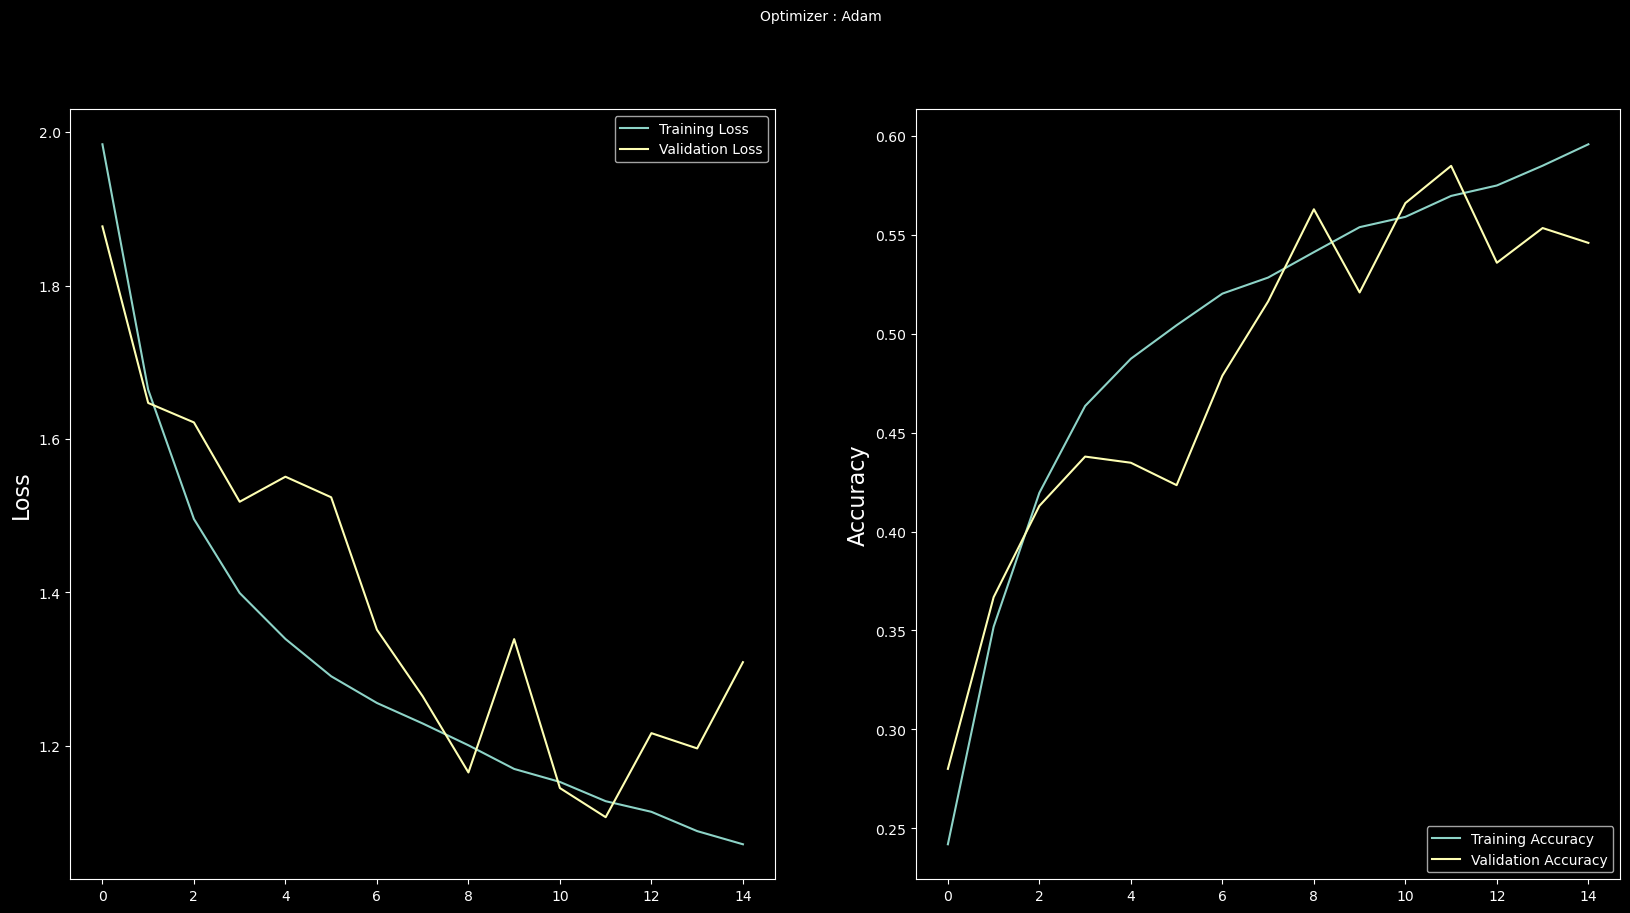

In [55]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Classification Report and Confusion Matrix

56/56 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step 
📄 Classification Report:

              precision    recall  f1-score   support

       angry       0.53      0.43      0.48       960
     disgust       1.00      0.13      0.22       111
        fear       0.47      0.24      0.32      1018
       happy       0.68      0.89      0.77      1825
     neutral       0.56      0.53      0.55      1216
         sad       0.44      0.51      0.47      1139
    surprise       0.69      0.77      0.73       797

    accuracy                           0.58      7066
   macro avg       0.62      0.50      0.50      7066
weighted avg       0.58      0.58      0.56      7066



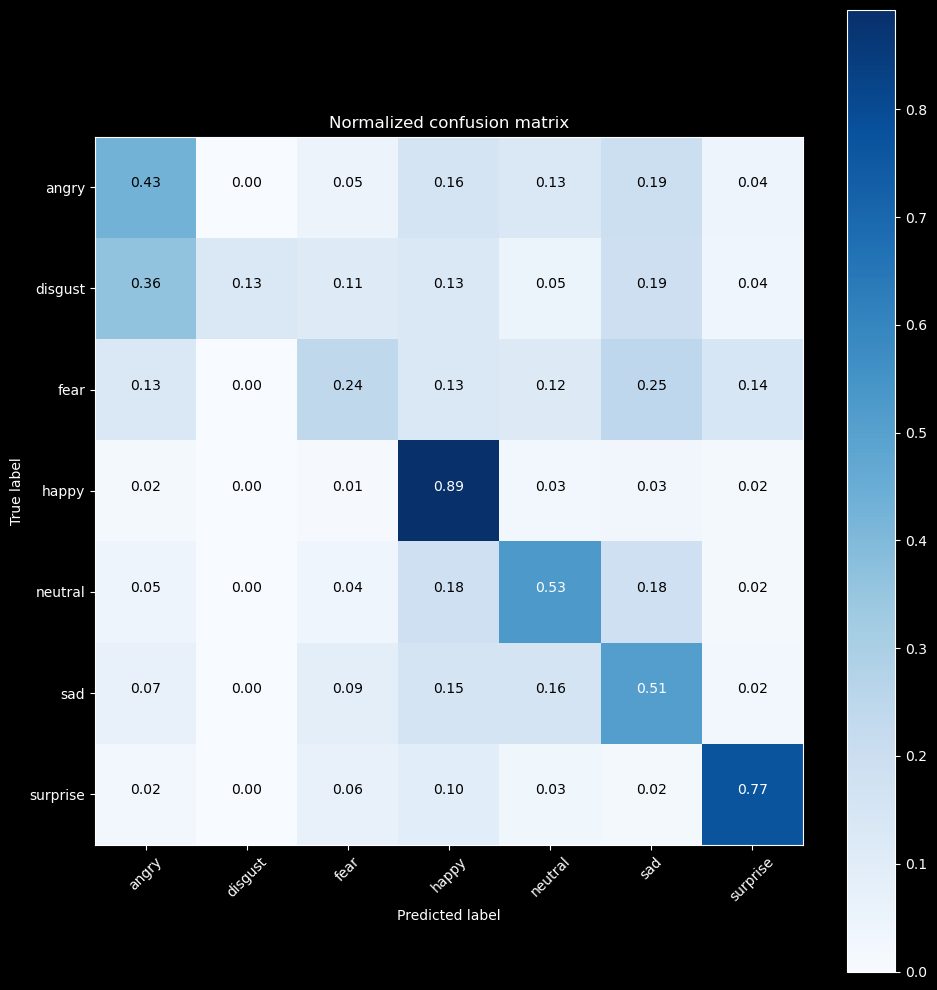

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Make predictions
predictions = model.predict(test_set)  # use predict instead of predict_generator
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = list(test_set.class_indices.keys())  # convert to list

# Classification report
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Define confusion matrix plotting function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


#**🖥️ Final Output / Results**
✅ What the project delivers:
* A real-time emotion detection app

* Webcam identifies your face and predicts the emotion

* Bounding box + label drawn on screen

* Predictions update as your facial expressions change

# **📌 Summary**

**Component:-	Description**
* Project Goal :-	Real-time facial emotion recognition
* Input	:- 48x48 grayscale face image
* Model	:- CNN (3-4 Conv layers + Dense layers)
* Dataset :-	~28,000 images in 7 emotion categories
* Output :-	Webcam video stream with bounding boxes and emotion labels